## Importing Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [142]:
df = pd.read_csv('telecom_churn.csv')
df['FrustrationScore'] = df[' CustServCalls'] / (df[' AccountWeeks'] + 1)
df['IsHighRoamer'] = (df[' RoamMins'] > 10).astype(int)
df['OveragePenalty'] = df[' OverageFee'] / (df[' MonthlyCharge'] + 1)
df['AvgMinsPerCall'] = df[' DayMins'] / (df[' DayCalls'] + 1)
df['UsesDataButNoPlan'] = ((df[' DataPlan'] == 0) & (df[' DataUsage'] > 0)).astype(int)
df['IsHeavyDataUser'] = (df[' DataUsage'] > df[' DataUsage'].mean()).astype(int)
df['ChurnRiskScore'] = (
    df[' CustServCalls']*0.3 +
    df[' RoamMins']*0.2 +
    df[' OverageFee']*0.2 +
    df['UsesDataButNoPlan']*0.3
)

X = df.drop(['Churn'], axis=1)
y = df['Churn']

## Spliting Dataset

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [144]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

## Model Evaluation

In [145]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9220389805097451
[[554  12]
 [ 40  61]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.84      0.60      0.70       101

    accuracy                           0.92       667
   macro avg       0.88      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667



## Visulaization

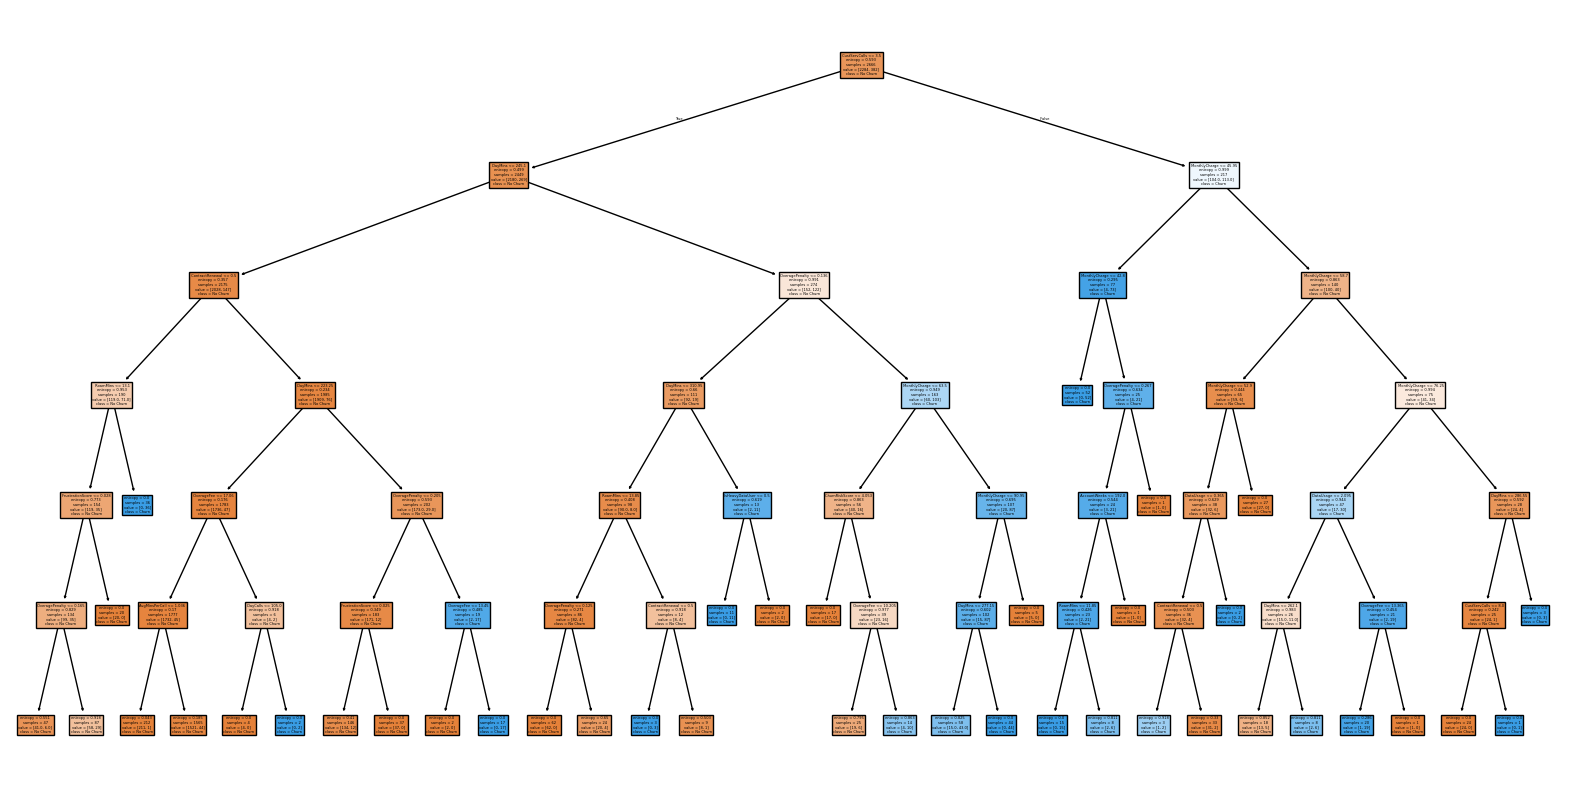

In [140]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True)
plt.show()
